**1.** Run the following cells to setup the environment

In [85]:
import requests, pandas as pd, json, copy
from IPython.display import JSON, Image

In [54]:
URL = 'http://mira.isi.edu:41728'

**2.** Load a dataset that we want to model, and show the content of the dataset.

The dataset is supposed to be a [relational table](https://www.ibm.com/support/knowledgecenter/SSWU4L/Data/imc_Data/Data_q_a_watson_assistant/Relational_Tables371.html). If the data format is CSV, the first row is the header.

In [19]:
df = pd.read_csv('./examples/ethiopia_dashboard.csv', header=0)
df.head(5)

,Country Name,Unnamed: 1,"Population, total","Life expectancy at birth, total (years)","GNI per capita, Atlas method (current US$)",GDP (current US$),CO2 emissions (metric tons per capita)
0,Ethiopia,1960,22151278.0,38.419,NaN,NaN,0.015892
1,Ethiopia,1961,22671191.0,39.082,NaN,NaN,0.015042
2,Ethiopia,1962,23221389.0,39.711,NaN,NaN,0.017055
3,Ethiopia,1963,23798430.0,40.290,NaN,NaN,0.017720
4,Ethiopia,1964,24397022.0,40.810,NaN,NaN,0.016684


**3.** To send the table to the API for annotation, we need to convert the original table into a JSON format below:
```json
{
    "ontologies": ["http://wikiba.se/ontology#"],
    "source": [
        {"name": "<column name>", "values": ["<value of the column in first row>", "<value of the column in second row>", "..."]
    ]
}
```
and send it in the body of a `POST` request to `/v1/annotate`

In [78]:
payload = {
    "ontologies": ["http://wikiba.se/ontology#"],
    "source": [
        {"name": "" if c.startswith("Unnamed:") else c, "values": df[c].tolist()}
        for c in df.columns
    ]
}
resp = requests.post(URL + "/v1/annotate", json=payload)

**4.** The JSON response that the server returns are in the following format:
```json
{
    "sm": {
        "<ont_class_id>": {
            "iri": "<uri of the ontology class>",
            "properties": [
                ["<ontology predicate 1>", "<column_index>"], 
                ["<ontology predicate 2>", "<column_index>"]
            ],
            "links": [
                ["<ontology predicate 1>", "<ont_class_id>"]
            ]
        }
    },
    "prefixes": {
        "<prefix>": "<url>"
    }
}
```

In [61]:
JSON(resp.json(), indent=4)

<IPython.core.display.JSON object>

Run the following cell to make the previous response friendly

In [79]:
data = copy.deepcopy(resp.json())
data['columns'] = df.columns.tolist()

In [87]:
resp2 = requests.post(URL + "/v1/draw", json=data, stream=all)

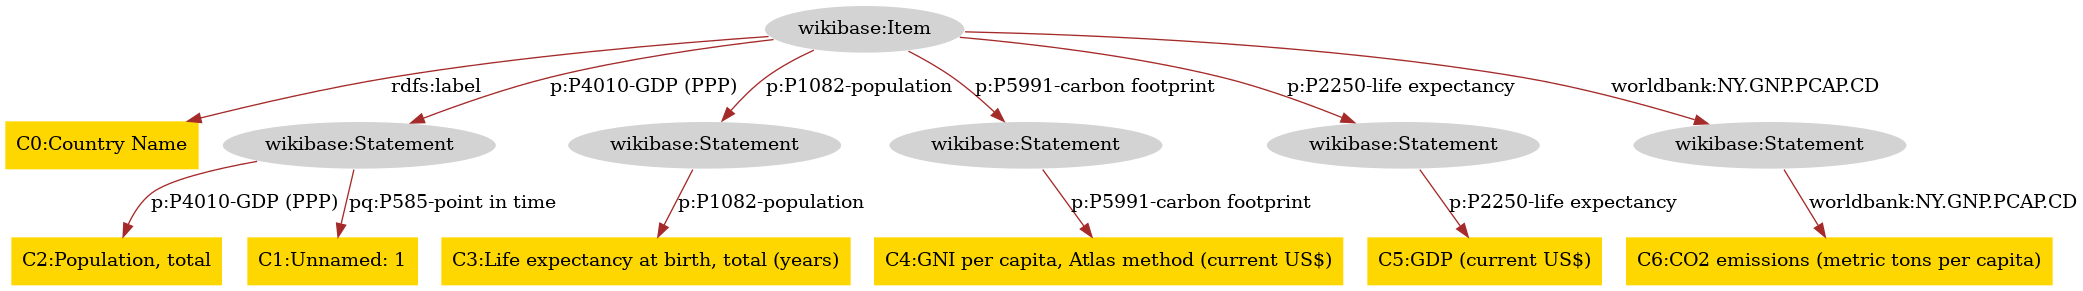

In [88]:
display(Image(resp2.content))